<a href="https://colab.research.google.com/github/Rotha-Vichet/ML-finalProject/blob/main/ML_HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction with Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings # This is the base class of all warning category classes. It is a subclass of Exception.
warnings.filterwarnings('ignore') # never print matching warnings

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Rotha-Vichet/ML-finalProject/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


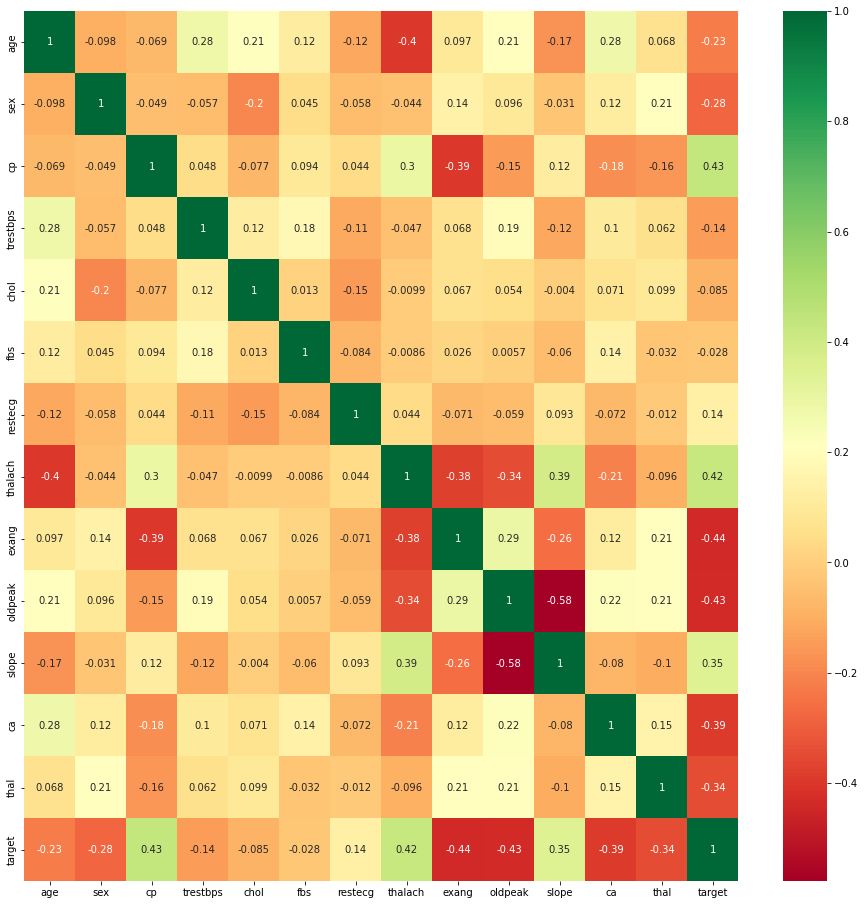

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show() # show which corr could have give a positive result of heart disease

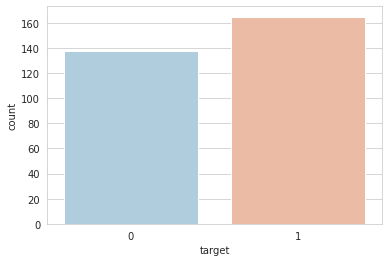

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show() # to show if the target classes we works with are of approximately equal size 

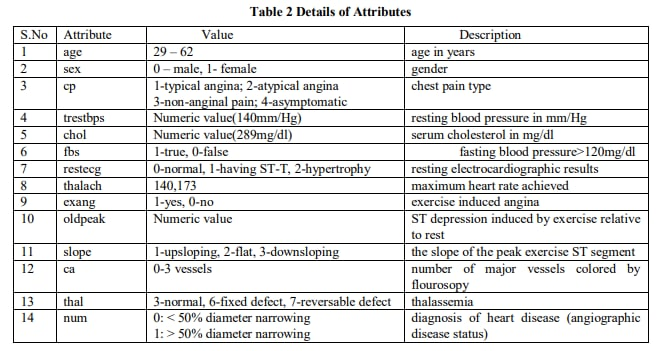

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [ ]:
y = df['target']
X = df.drop(['target'], axis = 1) # shot cut for setting variable 

# Find accuracy score

In [ ]:
#  split the data set 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(242, 13)
(61, 13)


Maximum accuracy:- 0.8852459016393442 at K = 12


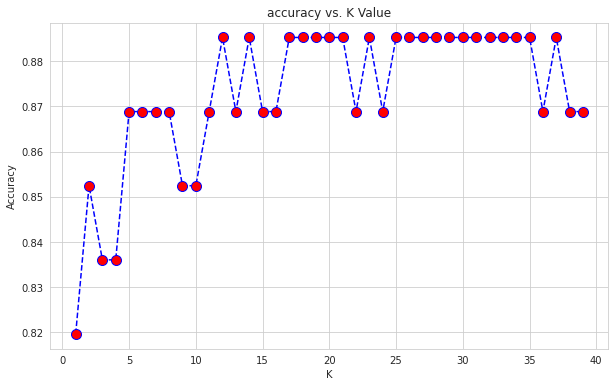

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
# Find KNN accuracy
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors = 12).fit(x_train,y_train)  
yhat = neigh.predict(x_test)
print(metrics.accuracy_score(y_test, yhat))


0.8852459016393442


In [ ]:
# find accuracy of random forest
randomforest_classifier= RandomForestClassifier(n_estimators=15).fit(x_train,y_train)
yhat = randomforest_classifier.predict(x_test)
print(metrics.accuracy_score(y_test, yhat))

0.8360655737704918


In [ ]:
# Support vector
from sklearn.svm import SVC

classifier = SVC(kernel='linear').fit(x_train,y_train)
yhat = classifier.predict(x_test)
print(metrics.accuracy_score(y_test, yhat))
    

0.8688524590163934


# speed of each algorithms

In [ ]:
import time
knn=KNeighborsClassifier(n_neighbors=8)
start_train= time.time()
knn.fit(x_train,y_train)
end_train = time.time()
start_test = time.time()
y_pred_train= knn.predict(x_train)
end_test= time.time()
y_pred_test= knn.predict(x_test)
print(f"Train_time: {start_train-end_train}, Test_time: {end_test-start_test}")

Train_time: -0.003381013870239258, Test_time: 0.016541719436645508


In [ ]:
import time
knn=RandomForestClassifier(n_estimators=15)
start_train= time.time()
knn.fit(x_train,y_train)
end_train = time.time()
start_test = time.time()
y_pred_train= knn.predict(x_train)
end_test= time.time()
y_pred_test= knn.predict(x_test)
print(f"Train_time: {start_train-end_train}, Test_time: {end_test-start_test}")

Train_time: -0.03901362419128418, Test_time: 0.00454258918762207


In [ ]:
import time
knn=SVC(kernel='linear')
start_train= time.time()
knn.fit(x_train,y_train)
end_train = time.time()
start_test = time.time()
y_pred_train= knn.predict(x_train)
end_test= time.time()
y_pred_test= knn.predict(x_test)
print(f"Train_time: {start_train-end_train}, Test_time: {end_test-start_test}")

Train_time: -0.011070966720581055, Test_time: 0.002478361129760742
